# PyTorch Crash Course

#### Overview: This notebook introduces PyTorch as an alternative to NumPy for scientific computing, focusing on tensor operations and dataset exploration. It demonstrates basic PyTorch functionality such as tensor arithmetic, custom functions, and working with datasets.

1. Tensor Basics
  - Create, Operations, NumPy, GPU Support

2. Function Basics
  - Write custom functions for tensor operations.

3. Working with Data
  - Load and analyze built-in datasets.



# Introduction: Understanding Vectors, Matrices, and Tensors

In this tutorial, we'll start by connecting mathematical concepts like vectors and matrices to something familiar: **tables**. By the end, you'll understand how these concepts are represented in programming and used in machine learning.
    

## Step 1: Tables

Let's start with something familiar: a **table**. For example:

| Name   | Age | Height | Weight | Eye Color | Hair Color |
|--------|-----|--------|--------|-----------|------------|
| Alice  | 24  | 5.6    | 130    | Brown     | Black      |
| Bob    | 30  | 5.8    | 150    | Blue      | Brown      |
| Carol  | 22  | 5.5    | 120    | Green     | Blonde     |
| David  | 28  | 5.9    | 170    | Hazel     | Black      |
| Eve    | 25  | 5.7    | 140    | Gray      | Red        |

This table organizes information about people. Each **column** (e.g., `Height`) is an example of a **vector**, and the numerical columns form a **matrix**. Categorical columns could contribute to a **tensor**.




## Step 2: Vectors

### Mathematical Definition

A **vector** is an ordered set of numbers, written as:
$$
\mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}
$$

- $$ v_1, v_2, \dots, v_n $$ are the components (Aka, dimensions) of the vector.
- A vector can have any number of dimensions (e.g., 2D, 3D, or higher).

For example, a 3D vector:
$$
\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
$$

### Operations on Vectors

1. **Addition**: Vectors of the same dimension can be added component-wise:
   $$
   \mathbf{u} + \mathbf{v} = \begin{bmatrix} u_1 + v_1 \\ u_2 + v_2 \\ \vdots \\ u_n + v_n \end{bmatrix}
   $$
2. **Scalar Multiplication**: Each component of the vector is multiplied by a scalar:
   $$
   c \cdot \mathbf{v} = \begin{bmatrix} c \cdot v_1 \\ c \cdot v_2 \\ \vdots \\ c \cdot v_n \end{bmatrix}
   $$
3. **Dot Product**: The dot product of two vectors $ \mathbf{u} $ and $\mathbf{v} $ is:
   $$
   \mathbf{u} \cdot \mathbf{v} = \sum_{i=1}^n u_i v_i
   $$


    

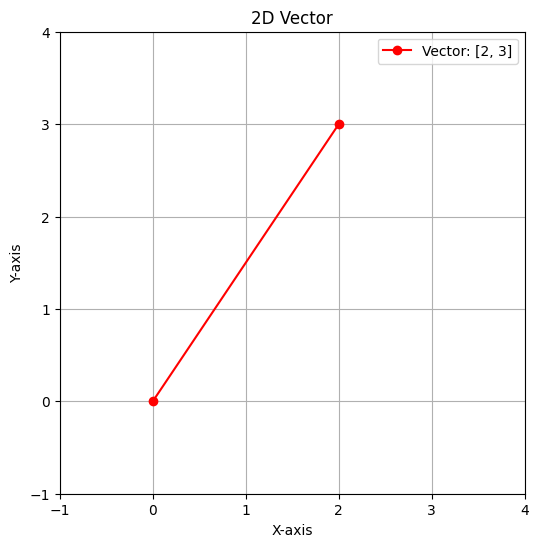

In [ ]:
import torch
import matplotlib.pyplot as plt

vector = torch.tensor([2.0, 3.0])
plt.figure(figsize=(6, 6))
plt.plot([0, vector[0].item()], [0, vector[1].item()], 'ro-', label='Vector: [2, 3]')
plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.grid(True)
plt.title("2D Vector")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()



### Visualizing a 3D Vector

For a 3D vector:
$$
\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}
$$
We can represent it in 3D space.



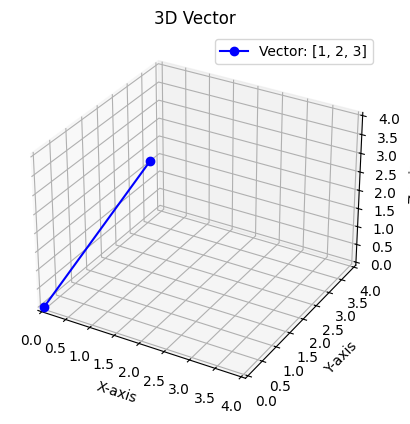

In [ ]:
# Visualize a 3D vector using PyTorch
vector_3d = torch.tensor([1.0, 2.0, 3.0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([0, vector_3d[0].item()], [0, vector_3d[1].item()], [0, vector_3d[2].item()], 'bo-', label='Vector: [1, 2, 3]')
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_zlim(0, 4)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Vector")
ax.legend()
plt.show()


## Step 3: Matrices

### Mathematical Definition

A **matrix** is a rectangular array of numbers, written as:
$$
\mathbf{M} = \begin{bmatrix} m_{11} & m_{12} & \dots & m_{1n} \\
                          m_{21} & m_{22} & \dots & m_{2n} \\
                          \vdots & \vdots & \ddots & \vdots \\
                          m_{m1} & m_{m2} & \dots & m_{mn} \end{bmatrix}
$$

- Each element $ m_{ij} $ represents the entry in the $i $-th row and $ j $-th column.
- A matrix can represent multiple vectors organized as rows or columns.
- A matrix with $ m $ rows and $ n $ columns has dimensions $ m \times n $.

For example, a 3x3 matrix:

$$
\mathbf{M} = \begin{bmatrix} 1 & 2 & 3 \\
                           4 & 5 & 6 \\
                           7 & 8 & 9 \end{bmatrix}
$$

$
\mathbf{M} \in \mathbb{R}^{3 \times 3}
$

### Operations on Matrices

1. **Addition/Subtraction**: Matrices of the same dimension can be added/subtracted element-wise.
2. **Scalar Multiplication**: Each element of the matrix is multiplied by a scalar.
3. **Matrix Multiplication**: The dot product of rows and columns results in:
   $$
   (\mathbf{A} \cdot \mathbf{B})_{ij} = \sum_k a_{ik} b_{kj}
   $$

    

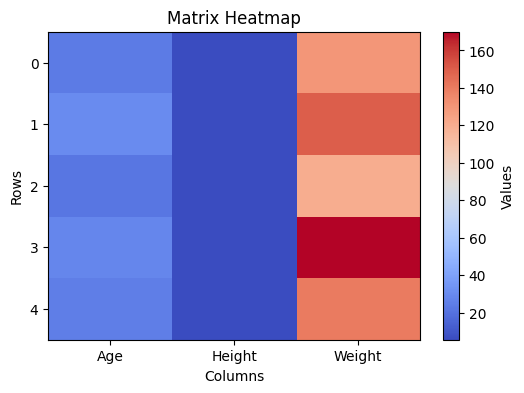

In [ ]:
# Visualize a matrix as a heatmap using PyTorch
matrix = torch.tensor([
    [24, 5.6, 130],
    [30, 5.8, 150],
    [22, 5.5, 120],
    [28, 5.9, 170],
    [25, 5.7, 140]
])
plt.figure(figsize=(6, 4))
plt.imshow(matrix.numpy(), cmap='coolwarm', aspect='auto')
plt.colorbar(label='Values')
plt.title("Matrix Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.xticks([0, 1, 2], ['Age', 'Height', 'Weight'])
plt.show()



## Step 4: Tensors

### Mathematical Definition

A **tensor** generalizes vectors and matrices to higher dimensions. A 3D tensor can be written as:
$$
\mathbf{T} = \begin{bmatrix} \mathbf{M}_1 \\ \mathbf{M}_2 \\ \vdots \\ \mathbf{M}_k \end{bmatrix}
$$

- $ \mathbf{M}_1, \mathbf{M}_2, \dots, \mathbf{M}_k $ are matrices.
- Each entry can represent complex data structures such as images or multidimensional datasets.

For example, a 3D tensor representing an RGB image:
$$
\mathbf{T} = \begin{bmatrix} \text{Red Channel} \\ \text{Green Channel} \\ \text{Blue Channel} \end{bmatrix}
$$

### Visualizing a 3D Tensor (RGB Image)

    


## Summary

- Tables → Vectors → Matrices → Tensors.
- Vectors and matrices can represent data in intuitive ways.
- Visualizing vectors helps bridge the gap between the abstract and the concrete.

Let's move on to how these concepts apply in PyTorch.
    

## Useful Commands

Everything in PyTorch is based on Tensor operations. Tensors are similar to NumPy arrays, with support for GPU acceleration and additional features for deep learning.


In [ ]:
import torch

# Examples of tensors
scalar = torch.tensor(5)  # Scalar (0D tensor)
vector = torch.tensor([1, 2, 3])  # Vector (1D tensor)
matrix = torch.tensor([[1, 2, 6], [3, 4, 8],[1,1,1]])  # Matrix (2D tensor)
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])  # 3D tensor

print("Scalar:", scalar)
print("Vector:", vector)
print("Matrix:\n", matrix)
print("3D Tensor:\n", tensor_3d)



Scalar: tensor(5)
Vector: tensor([1, 2, 3])
Matrix:
 tensor([[1, 2, 6],
        [3, 4, 8],
        [1, 1, 1]])
3D Tensor:
 tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [ ]:
# Direct from values
tensor_from_list = torch.tensor([[1, 2], [3, 4]])

# Special tensors
zeros = torch.zeros(2, 3)  # Tensor of zeros
ones = torch.ones(2, 3)  # Tensor of ones
identity = torch.eye(3)  # Identity matrix

# Random tensors
rand_tensor = torch.rand(2, 2)  # Uniform [0, 1)
normal_tensor = torch.randn(2, 2)  # Normal distribution

# Ranges
arange_tensor = torch.arange(0, 10, step=2)  # Start, stop, step
linspace_tensor = torch.linspace(0, 1, steps=5)  # Start, stop, steps

print("Tensor from list:\n", tensor_from_list)
print("\nZeros:\n", zeros)
print("\nIdentity Matrix:\n", identity)
print("\nArange Tensor:\n", arange_tensor)
print("\nLinspace Tensor:\n", linspace_tensor)


Tensor from list:
 tensor([[1, 2],
        [3, 4]])

Zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])

Identity Matrix:
 tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Arange Tensor:
 tensor([0, 2, 4, 6, 8])

Linspace Tensor:
 tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Properties
print("Shape:", tensor.shape)  # Shape of the tensor
print("Number of dimensions:", tensor.ndimension())  # Rank
print("Data type:", tensor.dtype)  # Data type
print("Device:", tensor.device)  # Device (CPU or GPU)


Shape: torch.Size([2, 3])
Number of dimensions: 2
Data type: torch.int64
Device: cpu


In [ ]:
# Reshaping
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]])
reshaped = tensor.view(3, 2)  # Reshape to 3 rows, 2 columns

# Flatten
flattened = torch.flatten(tensor)

# Transpose
transposed = tensor.T  # Transpose rows and columns

# Tensors like another
like_tensor = torch.zeros_like(tensor)

print("Original Tensor:\n", tensor)
print("\nReshaped Tensor:\n", reshaped)
print("\nFlattened Tensor:\n", flattened)
print("\nTransposed Tensor:\n", transposed)
print("\nZeros-Like Tensor:\n", like_tensor)


Original Tensor:
 tensor([[1, 2, 3],
        [4, 5, 6]])

Reshaped Tensor:
 tensor([[1, 2],
        [3, 4],
        [5, 6]])

Flattened Tensor:
 tensor([1, 2, 3, 4, 5, 6])

Transposed Tensor:
 tensor([[1, 4],
        [2, 5],
        [3, 6]])

Zeros-Like Tensor:
 tensor([[0, 0, 0],
        [0, 0, 0]])


In [ ]:
x = torch.tensor([1.0, 2.0, 3.0])
y = torch.tensor([4.0, 5.0, 6.0])

# Element-wise operations
print("Addition:", x + y)
print("Multiplication:", x * y)
print("Square root of x:", torch.sqrt(x))

# Matrix multiplication
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])
result = torch.matmul(A, B)  # Matrix multiplication
print("\nMatrix Multiplication Result:\n", result)


Addition: tensor([5., 7., 9.])
Multiplication: tensor([ 4., 10., 18.])
Square root of x: tensor([1.0000, 1.4142, 1.7321])

Matrix Multiplication Result:
 tensor([[19, 22],
        [43, 50]])


In [ ]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Indexing
print("First row:", tensor[0])
print("Element at (0, 1):", tensor[0, 1])

# Slicing
print("\nSliced Tensor (Rows 0-1, Columns 1-2):\n", tensor[0:2, 1:3])

# Modifying elements
tensor[1, 1] = 99
print("\nModified Tensor:\n", tensor)


First row: tensor([1, 2, 3])
Element at (0, 1): tensor(2)

Sliced Tensor (Rows 0-1, Columns 1-2):
 tensor([[2, 3],
        [5, 6]])

Modified Tensor:
 tensor([[ 1,  2,  3],
        [ 4, 99,  6],
        [ 7,  8,  9]])


In [ ]:
tensor = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

# Sum and mean
print("Sum of all elements:", torch.sum(tensor))
print("Mean of all elements:", torch.mean(tensor))

# Max and min
print("\nMax value:", torch.max(tensor))
print("Min value:", torch.min(tensor))

# Sum along a dimension
print("\nSum along rows:", torch.sum(tensor, dim=1))
print("Sum along columns:", torch.sum(tensor, dim=0))


Sum of all elements: tensor(21.)
Mean of all elements: tensor(3.5000)

Max value: tensor(6.)
Min value: tensor(1.)

Sum along rows: tensor([ 6., 15.])
Sum along columns: tensor([5., 7., 9.])


In [ ]:
x = torch.tensor([[1], [2], [3]])  # Shape (3, 1)
y = torch.tensor([4, 5, 6])        # Shape (3)

# Broadcasting adds y to each row of x
broadcasted = x + y
print("\nBroadcasted Result:\n", broadcasted)



Broadcasted Result:
 tensor([[5, 6, 7],
        [6, 7, 8],
        [7, 8, 9]])


In [ ]:
# PyTorch Tensor Basics: Exercises

import torch

# 1. Creating Tensors
# 1.1 Create a 1D tensor with values [10, 20, 30, 40].
# 1.2 Create a 2D tensor of shape (3, 3) filled with ones.
# 1.3 Create a tensor with values evenly spaced between 0 and 1 with 6 steps.

# Your solution here:



# 2. Tensor Properties
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
# 2.1 Find the shape of the tensor.
# 2.2 Determine the number of dimensions.
# 2.3 Check the data type of the tensor.

# Your solution here:



# 3. Indexing and Slicing
x = torch.tensor([[10, 20, 30], [40, 50, 60], [70, 80, 90]])
# 3.1 Extract the first row.
# 3.2 Extract the last column.
# 3.3 Slice out the sub-tensor containing the middle 2 rows and middle 2 columns.
# 3.4 Modify the value at the position (1, 1) (row 1, column 1) to 999.

# Your solution here:



# 4. Arithmetic Operations
x = torch.tensor([2, 4, 6, 8])
y = torch.tensor([1, 2, 3, 4])
# 4.1 Perform element-wise addition, subtraction, multiplication, and division.
# 4.2 Compute the square of each element in x.
# 4.3 Find the dot product of x and y.

# Your solution here:




# 5. Broadcasting
# 5.1 Add a 1D tensor [1, 2, 3] to each row of a 2D tensor.
x = torch.tensor([[10, 20, 30], [40, 50, 60]])
# 5.2 Multiply a column tensor [[1], [2], [3]] with a row tensor [4, 5, 6] to get a 2D tensor.

# Your solution here:



# 6. Tensor Reshaping
x = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8])
# 6.1 Reshape it into a (2, 4) tensor.
# 6.2 Flatten it back into a 1D tensor.
# 6.3 Transpose a (2, 3) tensor into a (3, 2) tensor.

# Your solution here:





# **PyTorch Tensor Basics: Exercises**

---

## **1. Creating Tensors**
1. Create the following tensors:
    - A 1D tensor with values `[10, 20, 30, 40]`.
    - A 2D tensor of shape `(3, 3)` filled with ones.
    - A tensor with values evenly spaced between 0 and 1 with 6 steps.

<details>
<summary>Click to see the solution</summary>

```python
# Solution
tensor_1d = torch.tensor([10, 20, 30, 40])
tensor_2d_ones = torch.ones(3, 3)
tensor_linspace = torch.linspace(0, 1, steps=6)
print("1D Tensor:", tensor_1d)
print("2D Tensor of Ones:\n", tensor_2d_ones)
print("Evenly Spaced Tensor:", tensor_linspace)


## **2. Tensor Properties**
Given the tensor `x = torch.tensor([[1, 2], [3, 4], [5, 6]])`, perform the following tasks:
1. Find the shape of the tensor.
2. Determine the number of dimensions.
3. Check the data type of the tensor.

<details>
<summary>Click to see the solution</summary>

```python
# Solution
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print("Shape of x:", x.shape)
print("Number of Dimensions:", x.ndimension())
print("Data Type:", x.dtype)


## **3. Indexing and Slicing**
Given the tensor `x = torch.tensor([[10, 20, 30], [40, 50, 60], [70, 80, 90]])`, perform the following tasks:
1. Extract the first row.
2. Extract the last column.
3. Slice out the sub-tensor containing the middle 2 rows and middle 2 columns.
4. Modify the value at the position `(1, 1)` (row 1, column 1) to 999.

<details>
<summary>Click to see the solution</summary>

```python
# Solution
x = torch.tensor([[10, 20, 30], [40, 50, 60], [70, 80, 90]])

# 1. Extract the first row
print("First Row:", x[0])

# 2. Extract the last column
print("Last Column:", x[:, -1])

# 3. Slice out the sub-tensor containing the middle 2 rows and middle 2 columns
print("Sliced Tensor:\n", x[1:, 1:])

# 4. Modify the value at the position (1, 1) to 999
x[1, 1] = 999
print("Modified Tensor:\n", x)


## **4. Arithmetic Operations**
Given the tensors `x = torch.tensor([2, 4, 6, 8])` and `y = torch.tensor([1, 2, 3, 4])`, perform the following tasks:
1. Perform element-wise addition, subtraction, multiplication, and division.
2. Compute the square of each element in `x`.
3. Find the dot product of `x` and `y`.

<details>
<summary>Click to see the solution</summary>

```python
# Solution
x = torch.tensor([2, 4, 6, 8])
y = torch.tensor([1, 2, 3, 4])

# 1. Element-wise addition, subtraction, multiplication, and division
print("Addition:", x + y)
print("Subtraction:", x - y)
print("Multiplication:", x * y)
print("Division:", x / y)

# 2. Compute the square of each element in x
print("Squared Elements:", x ** 2)

# 3. Dot product of x and y
print("Dot Product:", torch.dot(x, y))


## **5. Broadcasting**
Perform the following tasks using broadcasting:
1. Add a 1D tensor `[1, 2, 3]` to each row of a 2D tensor:
    ```python
    x = torch.tensor([[10, 20, 30], [40, 50, 60]])
    ```
2. Multiply a column tensor `[[1], [2], [3]]` with a row tensor `[4, 5, 6]` to get a 2D tensor.

<details>
<summary>Click to see the solution</summary>

```python
# Solution

# 1. Add a 1D tensor to each row of a 2D tensor
x = torch.tensor([[10, 20, 30], [40, 50, 60]])
y = torch.tensor([1, 2, 3])
print("Broadcasted Addition:\n", x + y)

# 2. Multiply a column tensor with a row tensor
column_tensor = torch.tensor([[1], [2], [3]])
row_tensor = torch.tensor([4, 5, 6])
print("Broadcasted Multiplication:\n", column_tensor * row_tensor)


## 2. Functions

Functions are reusable blocks of code that take input(s), process them, and return output(s). In Python, we use the def keyword to define functions. Functions are particularly useful for organizing code, avoiding repetition, and improving clarity.

In PyTorch, functions can encapsulate tensor operations, making it easier to perform specific tasks repeatedly, such as mathematical computations or tensor manipulations.


In [ ]:
def function_name(parameters):
    # Code block that processes the input(s)
    return result

# function_name: The name of the function.
# parameters: The input(s) to the function. These can be tensors, numbers, or other types.
# return: The output of the function, returned to the caller.

In [ ]:
def add_tensors(tensor1, tensor2):
    return tensor1 + tensor2

# Example usage
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
result = add_tensors(x, y)
print("Result of Addition:", result)


Result of Addition: tensor([5, 7, 9])


In [ ]:
def tensor_operations(tensor1, tensor2):
    addition = tensor1 + tensor2
    multiplication = tensor1 * tensor2
    dot_product = torch.dot(tensor1, tensor2)
    return addition, multiplication, dot_product

# Example usage
x = torch.tensor([1, 2, 3], dtype=torch.float32)
y = torch.tensor([4, 5, 6], dtype=torch.float32)
add, multiply, dot = tensor_operations(x, y)
print("Addition:", add)
print("Multiplication:", multiply)
print("Dot Product:", dot)


Addition: tensor([5., 7., 9.])
Multiplication: tensor([ 4., 10., 18.])
Dot Product: tensor(32.)


In [ ]:
def tensor_reductions(tensor):
    tensor = tensor.float()  # Explicitly cast to float
    total_sum = torch.sum(tensor)
    mean_value = torch.mean(tensor)
    max_value = torch.max(tensor)
    return total_sum, mean_value, max_value

# Example usage
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
sum_val, mean_val, max_val = tensor_reductions(x)
print("Sum:", sum_val)
print("Mean:", mean_val)
print("Max:", max_val)


Sum: tensor(21.)
Mean: tensor(3.5000)
Max: tensor(6.)


In [ ]:
def normalize_tensor(tensor):
    min_val = torch.min(tensor)
    max_val = torch.max(tensor)
    return (tensor - min_val) / (max_val - min_val)

# Example usage
x = torch.tensor([2.0, 4.0, 6.0, 8.0])
normalized = normalize_tensor(x)
print("Normalized Tensor:", normalized)


Normalized Tensor: tensor([0.0000, 0.3333, 0.6667, 1.0000])


In [ ]:
def relu(tensor):
    return torch.maximum(tensor, torch.tensor(0.0))

# Example usage
x = torch.tensor([-1.0, 0.0, 1.0, 2.0])
activated = relu(x)
print("ReLU Activation:", activated)


ReLU Activation: tensor([0., 0., 1., 2.])


## 2. Data visualization

Data visualization is crucial for understanding datasets, models, and outputs. PyTorch, combined with Matplotlib, makes it easy to:

    1- Visualize tensors directly.
    2- Plot results like losses or predictions.
    3- Analyze datasets like images and distributions.

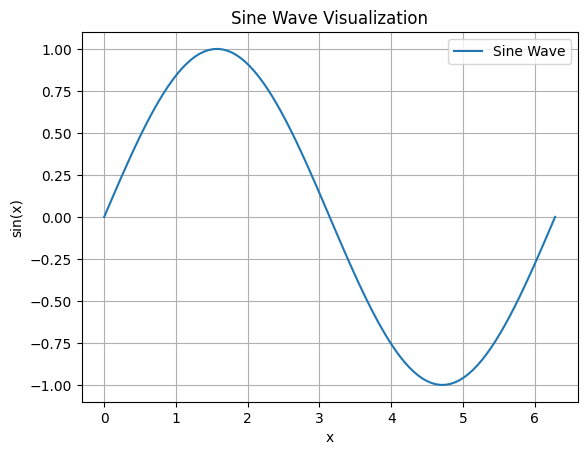

In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate tensor data for sine wave
x = torch.linspace(0, 2 * torch.pi, 100)
y = torch.sin(x)

# Plot the sine wave
plt.plot(x.numpy(), y.numpy(), label="Sine Wave")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("Sine Wave Visualization")
plt.legend()
plt.grid()
plt.show()


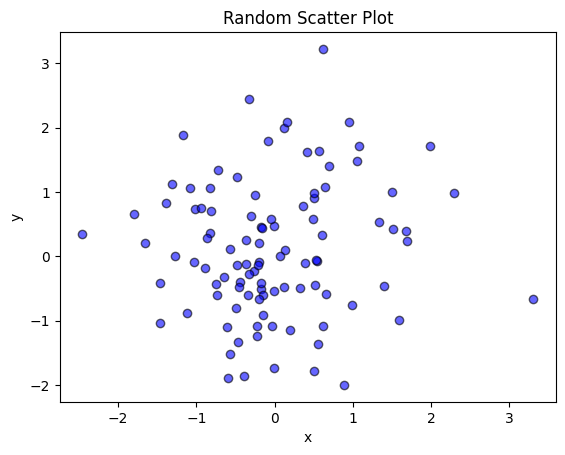

In [ ]:
# Generate random 2D points
x = torch.randn(100)
y = torch.randn(100)

# Scatter plot
plt.scatter(x.numpy(), y.numpy(), color="blue", alpha=0.6, edgecolor="black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Random Scatter Plot")
plt.show()


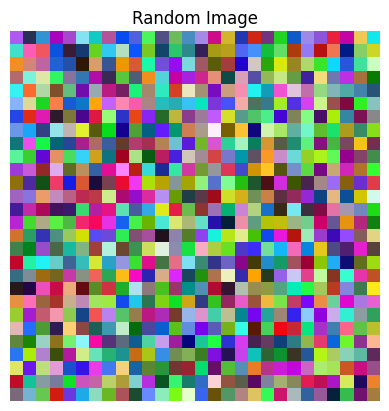

In [ ]:
# Create a random image tensor (3, 28, 28)
image_tensor = torch.rand(3, 28, 28)

# Convert to numpy format for plotting
image_numpy = image_tensor.permute(1, 2, 0).numpy()  # Rearrange dimensions (H, W, C)

# Plot the image
plt.imshow(image_numpy)
plt.title("Random Image")
plt.axis("off")
plt.show()


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 435kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.98MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.2MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



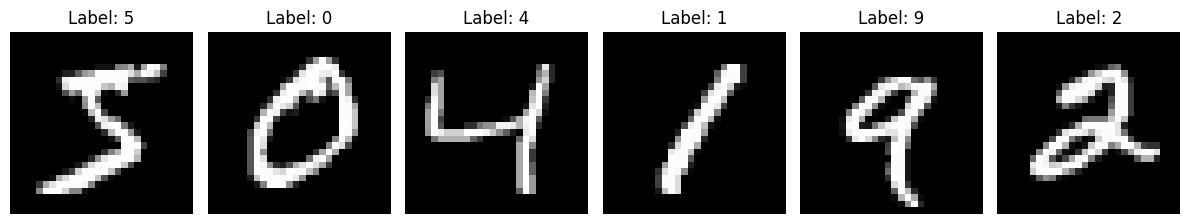

In [ ]:
from torchvision import datasets, transforms

# Load MNIST dataset
transform = transforms.ToTensor()
mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

# Visualize 6 samples
fig, axes = plt.subplots(1, 6, figsize=(12, 4))
for i in range(6):
    image, label = mnist[i]
    axes[i].imshow(image.squeeze(), cmap="gray")
    axes[i].set_title(f"Label: {label}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


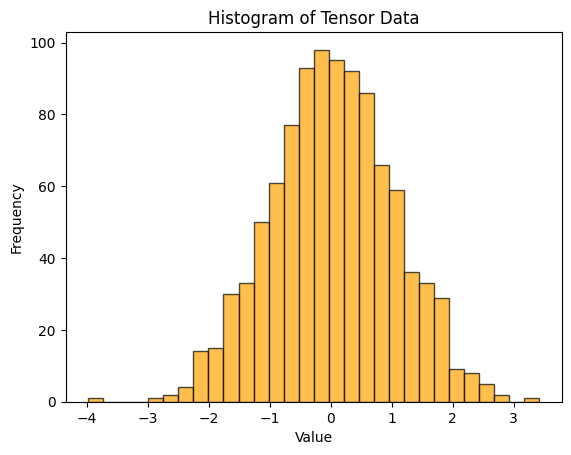

In [ ]:
# Generate random tensor data
data = torch.randn(1000)

# Plot histogram
plt.hist(data.numpy(), bins=30, color="orange", edgecolor="black", alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Tensor Data")
plt.show()
